# 1. Preprocessing the data

## Initial preprocessing steps

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Loading data and dropping string columns that we will not use.

Also dropping columns which have 1 value

In [13]:
import pandas
import numpy as np
try:
    df = pandas.read_csv('drive/My Drive/autos.csv', sep=",", encoding = 'Latin1')
except:
    df = pandas.read_csv('autos.csv', sep=",", encoding = 'Latin1')

df = df.drop(['name','seller', 'abtest', 'offerType', 'nrOfPictures', 'lastSeen', 'abtest', 'postalCode', 'dateCreated', 'dateCrawled'], axis=1)

display(df)

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,18300,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
...,...,...,...,...,...,...,...,...,...,...,...
371523,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN
371524,1199,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein
371525,9200,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein
371526,3400,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN


In [14]:
# Look at distributions of the numerical columns
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000


In [15]:
# Eliminating outliers that do not make sense

print('records with <= 0 horsepower: ', len(df[df['powerPS'] <= 0].index))
print('records with > 1500 horsepower: ', len(df[df['powerPS'] > 1500].index)) #https://en.wikipedia.org/wiki/List_of_production_cars_by_horsepower has 2015 cars with max 1500PS
print('records with year > 2019: ', len(df[df['yearOfRegistration'] > 2019].index))
print('records with year < 1900: ', len(df[df['yearOfRegistration'] < 1900].index))
print('records with price <= 10 ', len(df[df['price'] <= 10].index))
print('records with price > 1e6 ', len(df[df['price'] > 1e6].index))

df_removed_outliers = df[
                         (df['powerPS'] > 0) & (df['powerPS'] <= 1500)
                         & (df['yearOfRegistration'] >= 1900) & (df['yearOfRegistration'] < 2020)
                         & (df['price'] > 10) & (df['price'] < 1e6)
                      ]

records with <= 0 horsepower:  40820
records with > 1500 horsepower:  207
records with year > 2019:  114
records with year < 1900:  68
records with price <= 10  12118
records with price > 1e6  65


,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
count,322771.000000,322771.000000,322771.000000,322771.000000,322771.000000
mean,6316.325237,2003.608199,126.477063,125516.062472,5.979939
std,11478.876584,7.211519,65.602833,39298.922014,3.586419
min,11.000000,1910.000000,1.000000,5000.000000,0.000000
25%,1400.000000,1999.000000,80.000000,100000.000000,3.000000
50%,3495.000000,2004.000000,116.000000,150000.000000,6.000000
75%,7950.000000,2008.000000,150.000000,150000.000000,9.000000
max,999999.000000,2019.000000,1500.000000,150000.000000,12.000000


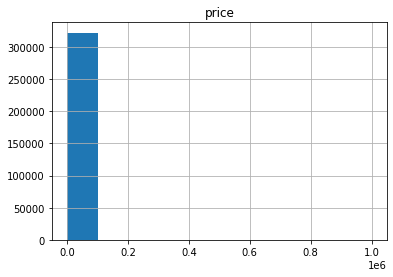

In [16]:
df_removed_outliers.hist(column='price')
df_removed_outliers.describe()

In [0]:
# Replace price by column log_price as it is highly right-skewed
log_price = np.log10(df_removed_outliers['price'])
log_price.name = 'log_price'
df_log = pandas.concat([log_price, df_removed_outliers], axis=1).drop(['price'], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f73a02093c8>]],
      dtype=object)

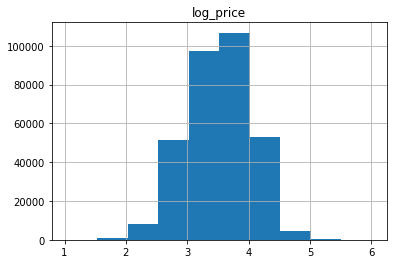

In [18]:
df_log.hist(column='log_price')

In [19]:
# Exploring distinct values for categorical variables
print(df_log['gearbox'].value_counts(dropna=False))
print()
print(df_log['notRepairedDamage'].value_counts(dropna=False))
print()
print(df_log['fuelType'].value_counts(dropna=False))
print()
print(df_log['vehicleType'].value_counts(dropna=False))
print()
print(df_log['brand'].value_counts(dropna=False))
print()
print(df_log['model'].value_counts(dropna=False))

manuell      245797
automatik     70828
NaN            6146
Name: gearbox, dtype: int64

nein    245516
NaN      47501
ja       29754
Name: notRepairedDamage, dtype: int64

benzin     198837
diesel      98261
NaN         19886
lpg          4853
cng           503
hybrid        247
andere         97
elektro        87
Name: fuelType, dtype: int64

limousine     87306
kleinwagen    70193
kombi         61529
bus           27570
NaN           21375
cabrio        21367
coupe         17300
suv           13588
andere         2543
Name: vehicleType, dtype: int64

volkswagen        69361
bmw               36266
opel              34017
mercedes_benz     31114
audi              29702
ford              21766
renault           14607
peugeot            9679
fiat               7996
seat               6244
skoda              5193
mazda              4955
smart              4611
citroen            4440
nissan             4270
toyota             4200
hyundai            3254
mini               3235
volvo   

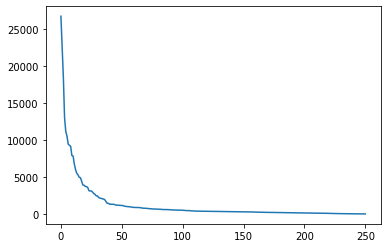

In [20]:
import matplotlib.pyplot as plt
plt.plot(df_log['model'].value_counts(dropna=False).values)

In [21]:
# Translating categorical variables to 0 and 1 values
df = df_log
df['gearbox'].loc[df['gearbox'] == 'manuell'] = 1
df['gearbox'].loc[df['gearbox'] == 'automatik'] = 0
df = df.dropna(axis=0, subset=['gearbox'])

df['notRepairedDamage'].loc[df['notRepairedDamage'] == 'ja'] = 1
df['notRepairedDamage'].loc[df['notRepairedDamage'] == 'nein'] = 0
df = df.dropna(axis=0, subset=['notRepairedDamage'])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Create a version of the data without model or brand one-hot encoded to reduce the dimensions

In [22]:
# One hot encoding on vehicleType and fuelType (skipping model and brand for now), using drop_first to not introduce redundant columns
cats_no_model_brand = pandas.get_dummies(df[['vehicleType', 'fuelType']], drop_first=True)
df2 = df.drop(['vehicleType', 'fuelType','brand', 'model'], axis = 1)
years_old = 2016 - df2['yearOfRegistration']
years_old.name ='years_old'
df2 = df2.drop(['yearOfRegistration'], axis = 1)
df2 = pandas.concat([df2, cats_no_model_brand, years_old], axis = 1)
display(df2)

,log_price,gearbox,powerPS,kilometer,monthOfRegistration,notRepairedDamage,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,fuelType_benzin,fuelType_cng,fuelType_diesel,fuelType_elektro,fuelType_hybrid,fuelType_lpg,years_old
1,4.262451,1,190,125000,5,1,0,0,1,0,0,0,0,0,0,1,0,0,0,5
3,3.176091,1,75,150000,6,0,0,0,0,1,0,0,0,1,0,0,0,0,0,15
4,3.556303,1,69,90000,7,0,0,0,0,1,0,0,0,0,0,1,0,0,0,8
5,2.812913,1,102,150000,10,1,0,0,0,0,0,1,0,1,0,0,0,0,0,21
6,3.342423,1,109,150000,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371519,3.720159,0,150,150000,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
371520,3.505150,1,225,150000,5,1,0,0,0,0,0,1,0,1,0,0,0,0,0,12
371524,3.078819,0,101,125000,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,16
371525,3.963788,1,102,150000,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,20


In [23]:
df2.to_csv('processed_without_modelbrand.csv', index='False')
print(df2)


        log_price gearbox  powerPS  ...  fuelType_hybrid  fuelType_lpg years_old
1        4.262451       1      190  ...                0             0         5
3        3.176091       1       75  ...                0             0        15
4        3.556303       1       69  ...                0             0         8
5        2.812913       1      102  ...                0             0        21
6        3.342423       1      109  ...                0             0        12
...           ...     ...      ...  ...              ...           ...       ...
371519   3.720159       0      150  ...                0             0         0
371520   3.505150       1      225  ...                0             0        12
371524   3.078819       0      101  ...                0             0        16
371525   3.963788       1      102  ...                0             0        20
371527   4.462248       1      320  ...                0             0         3

[271997 rows x 20 columns]


## Create complete model file with brand and model one-hot encoded variables

In [24]:
# Finish one-hot encoding model and brand variables
cats = pandas.get_dummies(df[['brand','vehicleType', 'fuelType', 'model']], drop_first=True)
df = df.drop(['brand','vehicleType', 'fuelType', 'model'], axis = 1)
years_old = 2016 - df['yearOfRegistration']
years_old.name ='years_old'
df = df.drop(['yearOfRegistration'], axis = 1)
df = pandas.concat([df, cats, years_old], axis = 1)
display(df)

,log_price,gearbox,powerPS,kilometer,monthOfRegistration,notRepairedDamage,brand_audi,brand_bmw,brand_chevrolet,brand_chrysler,brand_citroen,brand_dacia,brand_daewoo,brand_daihatsu,brand_fiat,brand_ford,brand_honda,brand_hyundai,brand_jaguar,brand_jeep,brand_kia,brand_lada,brand_lancia,brand_land_rover,brand_mazda,brand_mercedes_benz,brand_mini,brand_mitsubishi,brand_nissan,brand_opel,brand_peugeot,brand_porsche,brand_renault,brand_rover,brand_saab,brand_seat,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,...,model_spider,model_sportage,model_sprinter,model_stilo,model_superb,model_swift,model_terios,model_tigra,model_tiguan,model_toledo,model_touareg,model_touran,model_transit,model_transporter,model_tt,model_tucson,model_twingo,model_up,model_v40,model_v50,model_v60,model_v70,model_v_klasse,model_vectra,model_verso,model_viano,model_vito,model_vivaro,model_voyager,model_wrangler,model_x_reihe,model_x_trail,model_x_type,model_xc_reihe,model_yaris,model_yeti,model_ypsilon,model_z_reihe,model_zafira,years_old
1,4.262451,1,190,125000,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
3,3.176091,1,75,150000,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15
4,3.556303,1,69,90000,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
5,2.812913,1,102,150000,10,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21
6,3.342423,1,109,150000,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371519,3.720159,0,150,150000,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
371520,3.505150,1,225,150000,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12
371524,3.078819,0,101,125000,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16
371525,3.963788,1,102,150000,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20


In [25]:
#Loop for counting brand and model variables
column_list = df.columns.tolist()
model_cnt = 0
brand_cnt = 0
total_cnt = 0

for item in column_list:
  if item.startswith('model'):
    model_cnt += 1
  elif item.startswith('brand'):
    brand_cnt += 1
  total_cnt +=1
print('models: ', model_cnt)
print('brands: ', brand_cnt)
print('total: ', total_cnt)

models:  249
brands:  39
total:  308


In [0]:
df.to_csv('processed.csv', index='False')

# 2. Initial Models on Raw Data

## Linear Regression on Raw Data

In [0]:
#Multiple Linear Regression

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Loading the dataset
try:
  dataset = pd.read_csv('processed.csv')
except:
  dataset = pd.read_csv('drive/My Drive/processed.csv')
# print(dataset)

X = dataset.iloc[:,2:] #We are not using column 1. Also we slice it this way because we want X to be a matrix
y = dataset.iloc[:,1]

#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [0]:
# Import required libraries and create pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

print('starting pipeline')

lr_pipeline = Pipeline([
                    ('scale', StandardScaler()), 
                    ('LR', LinearRegression())
                     ], verbose=True)

lr_pipeline.fit(X_train, y_train)
y_pred = lr_pipeline.predict(X_test)

print(y_pred)
print(y_test)
print(mean_squared_error(y_test, y_pred))

starting pipeline
[Pipeline] ............. (step 1 of 2) Processing scale, total=   1.8s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   5.3s
[2.85932719 4.0153248  3.90359306 ... 4.14138205 3.95396876 3.45497342]
85971     3.113943
205804    4.037426
13374     3.913814
235012    4.041393
169522    3.060698
            ...   
16494     3.653213
259055    3.397940
24516     4.107210
13263     3.875061
25001     3.544068
Name: log_price, Length: 81600, dtype: float64
0.06779693364579975


In [0]:
print(10**y_pred)
print(10**y_test)
print(mean_squared_error(10**y_test, 10**y_pred))

[  723.31453045 10359.16613224  8009.27232257 ... 13847.84041978
  8994.32877639  2850.84375044]
85971      1300.0
205804    10900.0
13374      8200.0
235012    11000.0
169522     1150.0
           ...   
16494      4500.0
259055     2500.0
24516     12800.0
13263      7500.0
25001      3500.0
Name: log_price, Length: 81600, dtype: float64
232717125.6909711


## Decision Tree Regression on Raw Data

In [0]:
#Decision Tree Regression

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Loading the dataset
try:
  dataset = pd.read_csv('processed.csv')
except:
  dataset = pd.read_csv('drive/My Drive/processed.csv')

dataset.head()

,Unnamed: 0,log_price,gearbox,powerPS,kilometer,monthOfRegistration,notRepairedDamage,brand_audi,brand_bmw,brand_chevrolet,brand_chrysler,brand_citroen,brand_dacia,brand_daewoo,brand_daihatsu,brand_fiat,brand_ford,brand_honda,brand_hyundai,brand_jaguar,brand_jeep,brand_kia,brand_lada,brand_lancia,brand_land_rover,brand_mazda,brand_mercedes_benz,brand_mini,brand_mitsubishi,brand_nissan,brand_opel,brand_peugeot,brand_porsche,brand_renault,brand_rover,brand_saab,brand_seat,brand_skoda,brand_smart,brand_sonstige_autos,...,model_spider,model_sportage,model_sprinter,model_stilo,model_superb,model_swift,model_terios,model_tigra,model_tiguan,model_toledo,model_touareg,model_touran,model_transit,model_transporter,model_tt,model_tucson,model_twingo,model_up,model_v40,model_v50,model_v60,model_v70,model_v_klasse,model_vectra,model_verso,model_viano,model_vito,model_vivaro,model_voyager,model_wrangler,model_x_reihe,model_x_trail,model_x_type,model_xc_reihe,model_yaris,model_yeti,model_ypsilon,model_z_reihe,model_zafira,years_old
0,1,4.262451,1,190,125000,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
1,3,3.176091,1,75,150000,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15
2,4,3.556303,1,69,90000,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,5,2.812913,1,102,150000,10,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21
4,6,3.342423,1,109,150000,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12


In [0]:

X = dataset.iloc[:,2:].values 
y = dataset.iloc[:,1].values

#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

#Normalizing the features
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#Create and Fit a Regressor Object
from sklearn.tree import DecisionTreeRegressor
regObj = DecisionTreeRegressor()
regObj.fit(X_train,y_train) 
y_pred = regObj.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)

print(y_pred)
print(y_test)

0.05215963198602538
[3.47697647 4.39776626 2.92941893 ... 3.12915071 3.67209786 3.35378509]
[3.79927161 4.39776626 2.74036269 ... 3.11394335 3.30081279 3.11394335]


In [0]:
mse_exp = mean_squared_error(10**y_test, 10**y_pred)
print(mse_exp)
print(10**y_pred)
print(10**y_test)

63238336.62957917
[ 2999.         24990.           850.         ...  1346.32746688
  4700.          2258.31795813]
[ 6299. 24990.   550. ...  1300.  1999.  1300.]


## Random Forest Regression on Raw Data

In [0]:
#Random Forest Regression

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Loading the dataset
try:
  dataset = pd.read_csv('drive/My Drive/processed.csv')
except:
  dataset = pd.read_csv('processed.csv')
# print(dataset)

X = dataset.iloc[:,2:].values #We are not using column 1. Also we slice it this way because we want X to be a matrix
y = dataset.iloc[:,1].values

#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [0]:

# Import required libraries and create pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

print('starting pipeline')

rf_pipeline = Pipeline([
                    ('scale', StandardScaler()), 
                    ('rf', RandomForestRegressor(random_state=0, warm_start=True))
                     ], verbose=True)
grid_param = dict(rf__n_estimators=[10, 30, 50],
                  rf__min_impurity_decrease=[0.0001, 0.0005, 0.001, 0.005, 0.01],
                  rf__bootstrap=[True,False])
# Using a grid search to test parameters
from sklearn.model_selection import GridSearchCV

searchObj = GridSearchCV(rf_pipeline, grid_param, cv=10, scoring='neg_mean_squared_error', n_jobs=-1, verbose=10)
searchObj.fit(X_train, y_train)
print(searchObj.best_params_)  
print(searchObj.best_score_)
print(searchObj.cv_results_)

y_pred = searchObj.predict(X_test)

print(mean_squared_error(y_test, y_pred))


starting pipeline
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   39.0s
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 23.9min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 34.7min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 48.8min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 53.7min
[Parallel(n_jobs=-1)]: Done 

[Pipeline] ............. (step 1 of 2) Processing scale, total=   1.7s
[Pipeline] ................ (step 2 of 2) Processing rf, total=  57.2s
{'rf__bootstrap': True, 'rf__min_impurity_decrease': 0.0001, 'rf__n_estimators': 30}
-0.051883462787662114
{'mean_fit_time': array([ 37.41037881, 106.48005285, 176.66700032,  34.43511658,
        97.84750345, 160.38418941,  32.51820221,  92.90920942,
       155.58810871,  28.15670869,  80.77894983, 132.71200304,
        24.71310699,  68.82722774, 112.80238674,  63.21122918,
       178.44239843, 293.89306531,  57.1194845 , 163.39073746,
       281.35070131,  57.61378758, 167.59716959, 273.95390506,
        48.21097264, 140.39411359, 235.55724647,  41.07948866,
       119.13409047, 196.75952127]), 'std_fit_time': array([0.34073548, 0.55367524, 1.25640648, 0.32825324, 0.88548997,
       0.95288387, 0.36530926, 1.39886607, 1.55394641, 0.41947354,
       1.04162012, 1.34772929, 0.31539315, 0.94090691, 0.75545179,
       0.91861478, 1.89514745, 6.85197

In [0]:
print(10**y_test)
print(10**y_pred)
print(mean_squared_error(10**y_test,10**y_pred))

[ 1300. 10900.  8200. ... 12800.  7500.  3500.]
[ 1265.43811211 12702.14321607 11480.64955407 ... 11424.76961623
  4190.00020888  4743.35182132]
68681187.02017733


In [0]:
##runtime crashed, copying result from above:

mean_scores = np.array([-0.05219063, -0.05188346, -0.05190154, -0.06390886, -0.0636155 ,
       -0.06358362, -0.07416507, -0.07410867, -0.07427663, -0.10353169,
       -0.10344443, -0.10357986, -0.12385109, -0.12393154, -0.12403534,
       -0.05520944, -0.05520944, -0.05520944, -0.06685344, -0.06685344,
       -0.06685344, -0.0772552 , -0.0772552 , -0.0772552 , -0.10481646,
       -0.10481646, -0.10481646, -0.124201  , -0.124201  , -0.124201  ]).reshape(2,5,3)

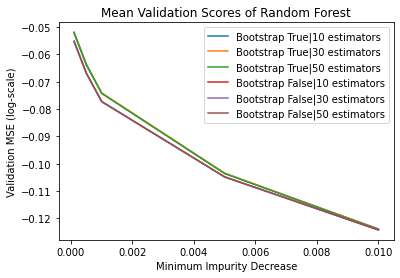

In [0]:
grid_param = dict(rf__n_estimators=[10, 30, 50],
                  rf__min_impurity_decrease=[0.0001, 0.0005, 0.001, 0.005, 0.01],
                  rf__bootstrap=[True,False])
plt.plot(grid_param['rf__min_impurity_decrease'], mean_scores[0,:,0],
         grid_param['rf__min_impurity_decrease'], mean_scores[0,:,1],
         grid_param['rf__min_impurity_decrease'], mean_scores[0,:,2],
         grid_param['rf__min_impurity_decrease'], mean_scores[1,:,0],
         grid_param['rf__min_impurity_decrease'], mean_scores[1,:,1],
         grid_param['rf__min_impurity_decrease'], mean_scores[1,:,2]
         )
plt.ylabel('Validation MSE (log-scale)')
plt.xlabel('Minimum Impurity Decrease')
plt.title('Mean Validation Scores of Random Forest')
plt.legend(('Bootstrap True|10 estimators', 'Bootstrap True|30 estimators', 'Bootstrap True|50 estimators', 'Bootstrap False|10 estimators', 'Bootstrap False|30 estimators', 'Bootstrap False|50 estimators'))
plt.show()

#3. Principal Component Analysis

##Initial modelling to determine # of components

In [0]:
#Linear PCA

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Loading the dataset
try:
  dataset = pd.read_csv('drive/My Drive/processed.csv')
except:
  dataset = pd.read_csv('processed.csv')

# print(dataset)

X = dataset.iloc[:,2:].values #We are not using column 1. Also we slice it this way because we want X to be a matrix
y = dataset.iloc[:,1].values

#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [0]:
# Import required libraries for PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Normalizing the features
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#Linear PCA
PCAObj = PCA(n_components=None, random_state=42)
X_train = PCAObj.fit_transform(X_train)
X_test = PCAObj.transform(X_test)



Number of components with 0.95 cumulative variance:  249


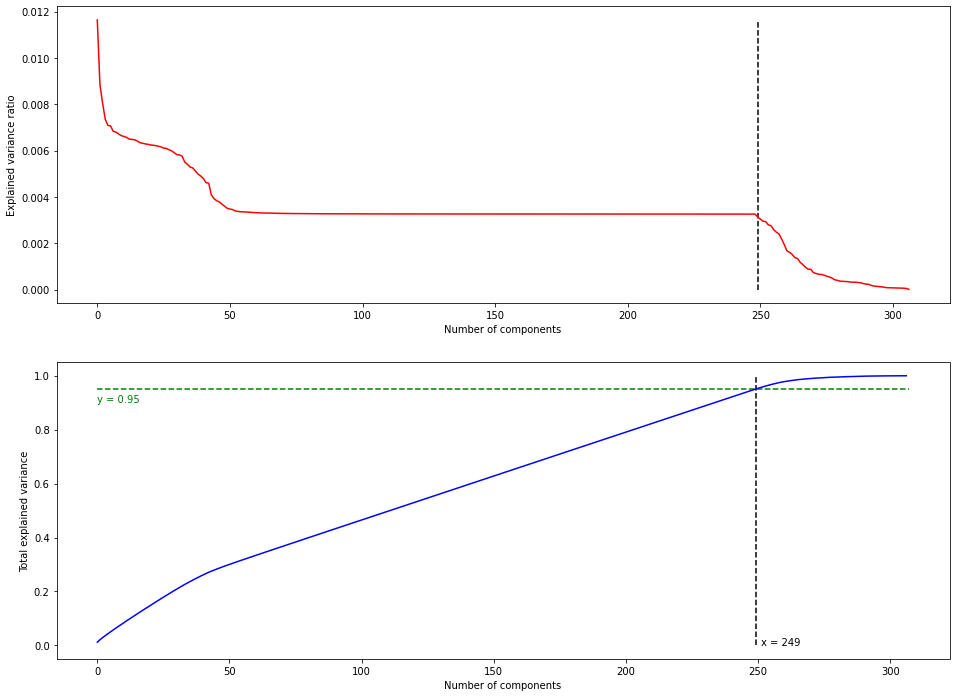

In [0]:
# Define cumulative explained variance ratio
total_variance = np.cumsum(PCAObj.explained_variance_ratio_)

# Show when total_variance is 0.95 using a plot
plt.figure(1, figsize=[16,12])
plot1 = plt.subplot(211)
plt.plot(PCAObj.explained_variance_ratio_, c='red')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')

plot2 = plt.subplot(212)
plt.plot(total_variance, c='blue')
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
# Look for where cumulative explained variance is 0.95
expl_95_index = np.where((total_variance > 0.949) & (total_variance < 0.951))[0][0]
print('Number of components with 0.95 cumulative variance: ', expl_95_index)
plt.hlines(0.95, 0, len(total_variance), linestyles='dashed', color='green')
plt.vlines(expl_95_index, 0, 1, linestyles='dashed')
plot1.vlines(expl_95_index, 0, np.max(PCAObj.explained_variance_ratio_), linestyles='dashed')
plt.text(0, 0.95-0.05, 'y = 0.95', color='green')
plt.text(expl_95_index+2, 0, 'x = '+str(expl_95_index))

plt.show()

## Clear variables except the index to "reset" the runtime

In [0]:
%reset_selective -f ^(?!expl_95_index).*$ 

## Run PCA + Linear Regression with the # of components from above

In [0]:
#Linear PCA

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Loading the dataset
try:
  dataset = pd.read_csv('drive/My Drive/processed.csv')
except:
  dataset = pd.read_csv('processed.csv')

# print(dataset)

X = dataset.iloc[:,2:].values #We are not using column 1. Also we slice it this way because we want X to be a matrix
y = dataset.iloc[:,1].values

#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [0]:
# Import required libraries for making a PCA pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

# Pipeline for predicting the target
LR_PCA_pipeline = Pipeline([
                    ('scale', StandardScaler()), 
                    ('PCA', PCA(n_components=expl_95_index, random_state=0)),
                    ('LR', LinearRegression())
                     ], verbose=True)

LR_PCA_pipeline.fit(X_train, y_train)
y_pred = LR_PCA_pipeline.predict(X_test)

[Pipeline] ............. (step 1 of 3) Processing scale, total=   1.3s
[Pipeline] ............... (step 2 of 3) Processing PCA, total=   5.9s
[Pipeline] ................ (step 3 of 3) Processing LR, total=   2.7s


In [0]:
# Evaluating the model
print(mean_squared_error(y_test, y_pred))

print(y_test)
print(y_pred)
print(mean_squared_error(10**y_test, 10**y_pred))

0.0842831499245702
[3.11394335 4.0374265  3.91381385 ... 4.10720997 3.87506126 3.54406804]
[2.8640125  3.9968724  3.78759324 ... 4.2347028  4.19279379 3.39635238]
91037812.76960085


In [0]:
%reset_selective -f ^(?!expl_95_index).*$ 

## Run PCA + Decision Tree Regression with the # of components from above

In [0]:
#PCA Decision Tree

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Loading the dataset
try:
  dataset = pd.read_csv('drive/My Drive/processed.csv')
except:
  dataset = pd.read_csv('processed.csv')

# print(dataset)

X = dataset.iloc[:,2:].values #We are not using column 1. Also we slice it this way because we want X to be a matrix
y = dataset.iloc[:,1].values

#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [0]:
# Import required libraries for making a PCA pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Pipeline for predicting the target
DT_PCA_pipeline = Pipeline([
                    ('scale', StandardScaler()), 
                    ('PCA', PCA(n_components=expl_95_index, random_state=0)),
                    ('decision_tree', DecisionTreeRegressor(random_state=0))
                     ], verbose=True)

grid_param = dict(decision_tree__min_samples_leaf=[1,2,4,8,16])
searchObj = GridSearchCV(DT_PCA_pipeline, grid_param, cv=10, scoring='neg_mean_squared_error', n_jobs=-1, verbose=10)
searchObj.fit(X_train, y_train)
y_pred = searchObj.predict(X_test)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 29.3min finished


[Pipeline] ............. (step 1 of 3) Processing scale, total=   1.9s
[Pipeline] ............... (step 2 of 3) Processing PCA, total=   7.2s
[Pipeline] ..... (step 3 of 3) Processing decision_tree, total= 1.3min


In [0]:
# Evaluating the model
print(searchObj.best_params_)
print(mean_squared_error(y_test, y_pred))

print(y_test)
print(y_pred)
print(mean_squared_error(10**y_test, 10**y_pred))

{'decision_tree__min_samples_leaf': 16}
0.05195000127555629
[3.11394335 4.0374265  3.91381385 ... 4.10720997 3.87506126 3.54406804]
[2.75767368 4.09654937 3.99312031 ... 4.11181464 4.04346161 3.58125818]
59790124.6732731


## Run PCA + Random Forest Regression with the # of components from above

In [0]:
# PCA Random Forest

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Loading the dataset
try:
  dataset = pd.read_csv('drive/My Drive/processed.csv')
except:
  dataset = pd.read_csv('processed.csv')

# print(dataset)

X = dataset.iloc[:,2:].values #We are not using column 1. Also we slice it this way because we want X to be a matrix
y = dataset.iloc[:,1].values

#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [0]:
# Import required libraries for making a PCA pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Pipeline for predicting the target
RF_PCA_pipeline = Pipeline([
                    ('scale', StandardScaler()), 
                    ('PCA', PCA(n_components=expl_95_index, random_state=0)),
                    ('random_forest', RandomForestRegressor(random_state=0, n_estimators=10))
                     ], verbose=True)

grid_param = dict(random_forest__min_samples_leaf=[1,2,4,8,16,32,64])
searchObj = GridSearchCV(RF_PCA_pipeline, grid_param, cv=10, scoring='neg_mean_squared_error', n_jobs=-1, verbose=10)
searchObj.fit(X_train, y_train)
y_pred = searchObj.predict(X_test)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 28.8min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 43.1min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 70.4min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 84.2min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 121.7min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 145.6min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 177.9min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed: 214.8min finished


[Pipeline] ............. (step 1 of 3) Processing scale, total=   2.4s
[Pipeline] ............... (step 2 of 3) Processing PCA, total=   6.9s
[Pipeline] ..... (step 3 of 3) Processing random_forest, total= 9.8min


In [0]:
# Evaluating the model
print(searchObj.best_params_)
print(mean_squared_error(y_test, y_pred))

print(y_test)
print(y_pred)
print(mean_squared_error(10**y_test, 10**y_pred))

{'random_forest__min_samples_leaf': 4}
0.03994580883392388
[3.11394335 4.0374265  3.91381385 ... 4.10720997 3.87506126 3.54406804]
[2.80846738 4.11299933 3.97394404 ... 4.13821421 3.98940529 3.62429493]
54557642.20787135


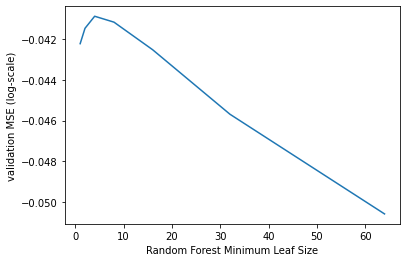

In [0]:
plt.plot(grid_param['random_forest__min_samples_leaf'], searchObj.cv_results_['mean_test_score'],
         )
plt.ylabel('validation MSE (log-scale)')
plt.xlabel('Random Forest Minimum Leaf Size')
plt.show()

In [0]:
#store results for later by printing
print(searchObj.cv_results_)

{'mean_fit_time': array([868.27028759, 829.42982767, 782.85304916, 735.92179899,
       682.93900478, 628.19381087, 546.5219111 ]), 'std_fit_time': array([ 8.36835357,  9.98268077,  4.82307847,  5.89689005,  6.51048334,
        4.79126662, 67.50454373]), 'mean_score_time': array([0.43250554, 0.3908941 , 0.4123816 , 0.40729544, 0.35730908,
       0.31658986, 0.29618168]), 'std_score_time': array([0.03526371, 0.03062551, 0.05884805, 0.08023027, 0.03718543,
       0.01229149, 0.04693929]), 'param_random_forest__min_samples_leaf': masked_array(data=[1, 2, 4, 8, 16, 32, 64],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'random_forest__min_samples_leaf': 1}, {'random_forest__min_samples_leaf': 2}, {'random_forest__min_samples_leaf': 4}, {'random_forest__min_samples_leaf': 8}, {'random_forest__min_samples_leaf': 16}, {'random_forest__min_samples_leaf': 32}, {'random_forest__min_samples_leaf': 64}], 'split0_t

#4. Kernel PCA

## IMPORTANT - Set Ny_components depending on available RAM for training

In [0]:
Ny_components = 2000 # number of samples in Nystroem subset, also number of components created
                     # limited by the available RAM 
                     # use <=1000 for Colab instance (12GB RAM)
                     # 4000 worked on GCP instance, but only for Linear Regression (64GB RAM)

##Initial modelling to determine # of components

In [0]:
# Approximate Kernel PCA using Nystroem

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Loading the dataset
try:
  dataset = pd.read_csv('drive/My Drive/processed.csv')
except:
  dataset = pd.read_csv('processed.csv')

# print(dataset)

X = dataset.iloc[:,2:].values #We are not using column 1. Also we slice it this way because we want X to be a matrix
y = dataset.iloc[:,1].values

#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [0]:
# Import required libraries for approximate Kernel PCA
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_approximation import Nystroem
from sklearn.decomposition import PCA

#Normalizing the features
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Nystroem approximation on a subset of data
# (used because kernelPCA is not feasible on the large dataset)
Ny = Nystroem(n_components=Ny_components, random_state=0)
X_train = Ny.fit_transform(X_train)
X_test = Ny.transform(X_test)

#Linear PCA
PCAObj = PCA(n_components=None, random_state=0)
X_train = PCAObj.fit_transform(X_train)
X_test = PCAObj.transform(X_test)


Number of components with 0.95 cumulative variance:  241


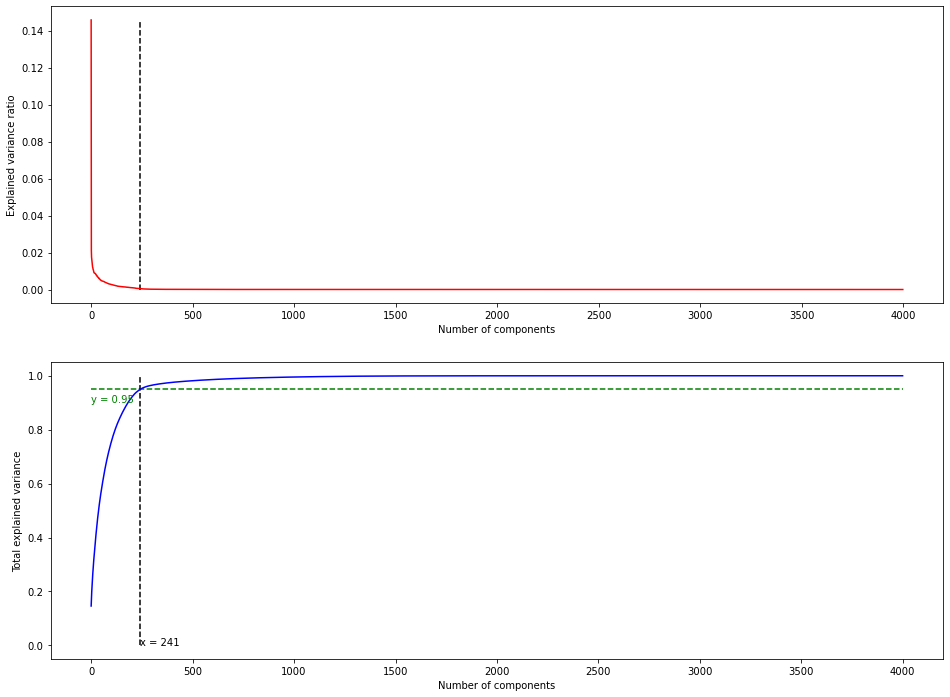

In [0]:
# Define cumulative explained variance ratio
total_variance = np.cumsum(PCAObj.explained_variance_ratio_)

# Show when total_variance is 0.95 using a plot
plt.figure(1, figsize=[16,12])
plot1 = plt.subplot(211)
plt.plot(PCAObj.explained_variance_ratio_, c='red')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')

plot2 = plt.subplot(212)
plt.plot(total_variance, c='blue')
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
# Look for where cumulative explained variance is 0.95
expl_95_index = np.where((total_variance > 0.949) & (total_variance < 0.951))[0][0]
print('Number of components with 0.95 cumulative variance: ', expl_95_index)
plt.hlines(0.95, 0, len(total_variance), linestyles='dashed', color='green')
plt.vlines(expl_95_index, 0, 1, linestyles='dashed')
plot1.vlines(expl_95_index, 0, np.max(PCAObj.explained_variance_ratio_), linestyles='dashed')
plt.text(0, 0.95-0.05, 'y = 0.95', color='green')
plt.text(expl_95_index+2, 0, 'x = '+str(expl_95_index))

plt.show()

## Clear variables except the index and Ny_components to "reset" the runtime

In [0]:
%reset_selective -f ^(?!expl_95_index|Ny_components).*$ 

## Run kPCA + Linear Regression with the # of components from above

In [0]:
#Kernal PCA (Nystroem approximation)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Loading the dataset
try:
  dataset = pd.read_csv('drive/My Drive/processed.csv')
except:
  dataset = pd.read_csv('processed.csv')

# print(dataset)

X = dataset.iloc[:,2:].values #We are not using column 1. Also we slice it this way because we want X to be a matrix
y = dataset.iloc[:,1].values

#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [0]:
# Import required libraries for making a PCA pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_approximation import Nystroem
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

# Pipeline for predicting the target
LR_PCA_pipeline = Pipeline([
                    ('scale', StandardScaler()), 
                    ('Ny', Nystroem(n_components=Ny_components, random_state=0)),
                    ('PCA', PCA(n_components=expl_95_index, random_state=0)),
                    ('LR', LinearRegression())
                     ], verbose=True)

LR_PCA_pipeline.fit(X_train, y_train)
y_pred = LR_PCA_pipeline.predict(X_test)

[Pipeline] ............. (step 1 of 4) Processing scale, total=   1.5s
[Pipeline] ................ (step 2 of 4) Processing Ny, total= 1.4min
[Pipeline] ............... (step 3 of 4) Processing PCA, total= 1.6min
[Pipeline] ................ (step 4 of 4) Processing LR, total=   2.2s


In [0]:
# Evaluating the model
print(mean_squared_error(y_test, y_pred))

print(10**y_test)
print(10**y_pred)
print(mean_squared_error(10**y_test, 10**y_pred))

0.07775042461368689
[ 1300. 10900.  8200. ... 12800.  7500.  3500.]
[  787.92629034 11381.9390791   8149.83560953 ... 12982.08972874
  9874.70002205  3063.78042276]
86176888.96506321


## Run kPCA + Decision Tree Regression with the # of components from above

In [0]:
#Kernal PCA (Nystroem approximation)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Loading the dataset
try:
  dataset = pd.read_csv('drive/My Drive/processed.csv')
except:
  dataset = pd.read_csv('processed.csv')

# print(dataset)

X = dataset.iloc[:,2:].values #We are not using column 1. Also we slice it this way because we want X to be a matrix
y = dataset.iloc[:,1].values

#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [0]:
# Import required libraries for making a PCA pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_approximation import Nystroem
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Pipeline for predicting the target
DT_PCA_pipeline = Pipeline([
                    ('scale', StandardScaler()), 
                    ('Ny', Nystroem(n_components=Ny_components, random_state=0)),
                    ('PCA', PCA(n_components=expl_95_index, random_state=0)),
                    ('decision_tree', DecisionTreeRegressor(random_state=0))
                     ], verbose=True)

grid_param = dict(decision_tree__min_samples_leaf=[1,2,4,8,16,32,64])
searchObj = GridSearchCV(DT_PCA_pipeline, grid_param, cv=10, scoring='neg_mean_squared_error', n_jobs=-1, verbose=10)
searchObj.fit(X_train, y_train)
y_pred = searchObj.predict(X_test)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 37.4min
[Parallel(n_jobs=-1)]: Done  63 out of  70 | elapsed: 49.6min remaining:  5.5min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed: 54.1min finished


[Pipeline] ............. (step 1 of 4) Processing scale, total=   1.9s
[Pipeline] ................ (step 2 of 4) Processing Ny, total=  28.0s
[Pipeline] ............... (step 3 of 4) Processing PCA, total=  36.3s
[Pipeline] ..... (step 4 of 4) Processing decision_tree, total= 1.1min


In [0]:
# Evaluating the model
print(mean_squared_error(y_test, y_pred))

print(10**y_test)
print(10**y_pred)
print(mean_squared_error(10**y_test, 10**y_pred))

0.058316507267753295
[ 1300. 10900.  8200. ... 12800.  7500.  3500.]
[  629.54598337 11254.88281003 13309.77890146 ... 12462.20367362
 14351.83913435  3346.39759444]
63457872.02619472


In [0]:
print(searchObj.best_params_)

{'decision_tree__min_samples_leaf': 32}


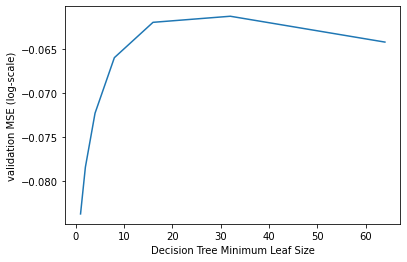

In [0]:
plt.plot(grid_param['decision_tree__min_samples_leaf'], searchObj.cv_results_['mean_test_score'],
         )
plt.ylabel('validation MSE (log-scale)')
plt.xlabel('Decision Tree Minimum Leaf Size')
plt.show()

In [0]:
%reset_selective -f ^(?!expl_95_index|Ny_components).*$ 

## Run kPCA + Random Forest Regression with the # of components from above

In [0]:
#Kernal PCA (Nystroem approximation)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Loading the dataset
try:
  dataset = pd.read_csv('drive/My Drive/processed.csv')
except:
  dataset = pd.read_csv('processed.csv')

# print(dataset)

X = dataset.iloc[:,2:].values #We are not using column 1. Also we slice it this way because we want X to be a matrix
y = dataset.iloc[:,1].values

#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [0]:
# Import required libraries for making a PCA pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_approximation import Nystroem
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Pipeline for predicting the target
RF_PCA_pipeline = Pipeline([
                    ('scale', StandardScaler()), 
                    ('Ny', Nystroem(n_components=Ny_components, random_state=0)),
                    ('PCA', PCA(n_components=expl_95_index, random_state=0)),
                    ('random_forest', RandomForestRegressor(random_state=0, n_estimators=10))
                     ], verbose=True)

grid_param = dict(random_forest__min_samples_leaf=[8,16,32,48],
                  random_forest__bootstrap=[True,False])
searchObj = GridSearchCV(RF_PCA_pipeline, grid_param, cv=10, scoring='neg_mean_squared_error', n_jobs=-1, verbose=10)
searchObj.fit(X_train, y_train)
y_pred = searchObj.predict(X_test)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 56.0min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 69.0min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 89.9min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 110.3min
[Parallel(n_jobs=-1)]: Done  74 out of  80 | elapsed: 165.3min remaining: 13.4min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 166.6min finished


[Pipeline] ............. (step 1 of 4) Processing scale, total=   3.2s
[Pipeline] ................ (step 2 of 4) Processing Ny, total=  28.0s
[Pipeline] ............... (step 3 of 4) Processing PCA, total=  38.9s
[Pipeline] ..... (step 4 of 4) Processing random_forest, total= 8.1min


In [0]:
# Evaluating the model
print(mean_squared_error(y_test, y_pred))

print(10**y_test)
print(10**y_pred)
print(mean_squared_error(10**y_test, 10**y_pred))

0.04287946927349297
[ 1300. 10900.  8200. ... 12800.  7500.  3500.]
[  596.45660441 13311.98569273 10758.77244215 ... 15173.44783019
 10057.73924049  3877.37743028]
58628144.88900101


In [0]:
print(searchObj.best_params_)

{'random_forest__bootstrap': True, 'random_forest__min_samples_leaf': 8}


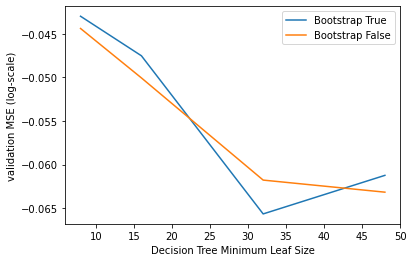

In [0]:
plt.plot(grid_param['random_forest__min_samples_leaf'], searchObj.cv_results_['mean_test_score'].reshape(4,2))
plt.ylabel('validation MSE (log-scale)')
plt.xlabel('Decision Tree Minimum Leaf Size')
plt.legend(('Bootstrap True', 'Bootstrap False'))
plt.show()

In [0]:
print(searchObj.cv_results_) # 4 true then 4 false

{'mean_fit_time': array([ 860.68234608,  831.65841589,  803.71851158,  771.84184527,
       1224.29380484, 1164.56404448, 1115.97804136, 1078.44388468]), 'std_fit_time': array([ 9.98233539, 14.61076898, 16.01630267,  8.54521895, 11.25702971,
       19.76944843, 19.26978512,  9.44378505]), 'mean_score_time': array([16.04355416, 13.74444447, 13.24606683, 12.64122586, 13.2256705 ,
       13.6114974 , 13.36759188, 10.13246899]), 'std_score_time': array([3.00583258, 1.80988153, 1.08356447, 1.07425964, 1.13224469,
       0.68816783, 0.78660765, 2.87188018]), 'param_random_forest__bootstrap': masked_array(data=[True, True, True, True, False, False, False, False],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_random_forest__min_samples_leaf': masked_array(data=[8, 16, 32, 48, 8, 16, 32, 48],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=o

#5. Recursive Feature Elimination

## Backward Elimination / Recursive Elimination using Linear Regression p-values

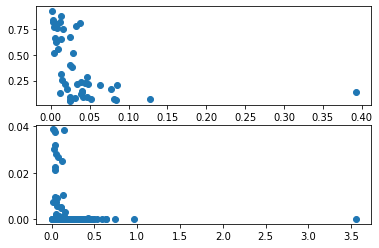

In [0]:
#Backward Elimination using statsmodels and Ordinary Least Squares p-values
import statsmodels.api as sm
X_cols = X.columns
X_withconstant = np.append(arr=np.ones((271997,1)).astype(int), values=X, axis=1)

X_sig = X_withconstant
obj_OLS = sm.OLS(endog = y, exog = X_sig).fit()

# scatterplot to evaluate if sklearn.model_feature_selection.RFECV
# which drops the lowest coefficients is giving similar results

#filter on p > 0.05 (likely to be dropped)
coefficients = abs(obj_OLS.params[obj_OLS.pvalues > 0.05])
p_values = obj_OLS.pvalues[obj_OLS.pvalues > 0.05]
plt.subplot(211)
plt.scatter(coefficients, p_values)

#filter on p < 0.05 (likely to keep)
coefficients2 = abs(obj_OLS.params[obj_OLS.pvalues < 0.05])
p_values2 = obj_OLS.pvalues[obj_OLS.pvalues < 0.05]
plt.subplot(212)
plt.scatter(coefficients2, p_values2)

From the plots, we can see there is no significant correlation between coefficients and p-values, so this would give a different result than RFECV

In [0]:
# Loop to remove p > 0.05 recursively
p_value = 1
while p_value > 0.05:
  obj_OLS = sm.OLS(endog = y, exog = X_sig).fit()
  p_value = np.max(obj_OLS.pvalues)
  p_index = np.argmax(obj_OLS.pvalues)
  print("Dropped column at index ", p_index, " with name", X_cols[p_index])
  X_cols = np.delete(X_cols, p_index)
  X_sig = np.delete(X_sig, p_index, 1)

print("Final shape", X_sig.shape)

Dropped column at index  294  with name model_vivaro
Dropped column at index  193  with name model_kuga
Dropped column at index  62  with name model_1er
Dropped column at index  199  with name model_lupo
Dropped column at index  250  with name model_sandero
Dropped column at index  11  with name brand_daewoo
Dropped column at index  54  with name fuelType_hybrid
Dropped column at index  130  with name model_clk
Dropped column at index  278  with name model_v40
Dropped column at index  173  with name model_i_reihe
Dropped column at index  281  with name model_vectra
Dropped column at index  21  with name brand_land_rover
Dropped column at index  196  with name model_m_reihe
Dropped column at index  142  with name model_delta
Dropped column at index  132  with name model_cooper
Dropped column at index  217  with name model_phaeton
Dropped column at index  20  with name brand_lancia
Dropped column at index  124  with name model_citigo
Dropped column at index  137  with name model_cx_reihe

In [0]:
#Splitting the data into Training Set and Test Set
X_sig_train, X_sig_test, y_sig_train, y_sig_test = train_test_split(X_sig, y, test_size=0.2,random_state=0)

# Import required libraries and create pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

print('starting pipeline')

lr_pipeline = Pipeline([
                    ('scale', StandardScaler()), 
                    ('LR', LinearRegression())
                     ], verbose=True)

lr_pipeline.fit(X_sig_train, y_sig_train)
y_sig_pred = lr_pipeline.predict(X_sig_test)

print(y_sig_pred)
print(y_test)
print(mean_squared_error(y_test, y_pred))
print(mean_squared_error(y_sig_test, y_sig_pred))
print(mean_squared_error(10**y_test, 10**y_pred))
print(mean_squared_error(10**y_sig_test, 10**y_sig_pred))

starting pipeline
[Pipeline] ............. (step 1 of 2) Processing scale, total=   1.9s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   4.4s
[2.86304988 4.01560928 3.90240744 ... 4.46237258 3.69146352 3.3384798 ]
85971     3.113943
205804    4.037426
13374     3.913814
235012    4.041393
169522    3.060698
            ...   
16494     3.653213
259055    3.397940
24516     4.107210
13263     3.875061
25001     3.544068
Name: log_price, Length: 81600, dtype: float64
0.06779693364579975
0.06695273751429334
232717125.6909711
114938853.19178033


In [0]:
# store boolean mask of removed variables
mask = [True if item in X_cols.to_list() else False for item in X.columns.to_list()]
print(mask)

[True, True, True, True, True, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, True, True, False, False, True, True, True, False, True, True, True, True, True, True, True, False, True, False, True, True, False, True, True, True, True, True, False, True, True, True, True, True, True,

In [0]:
# Copy of previous output
mask = [True, True, True, True, True, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, True, True, False, False, True, True, True, False, True, True, True, True, True, True, True, False, True, False, True, True, False, True, True, True, True, True, False, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, False, False, True, True, False, True, True, True, True, True, False, True, True, True, False, False, True, True, True, True, True, False, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, True, True, False, True, True, True, False, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True]
#On new runtime, fetch selected columns using the mask
df = X.iloc[:, mask]

In [0]:
#Loop for counting brand and model variables
column_list = df.columns.tolist()
model_cnt = 0
brand_cnt = 0
total_cnt = 0

for item in column_list:
  if item.startswith('model'):
    model_cnt += 1
  elif item.startswith('brand'):
    brand_cnt += 1
  total_cnt +=1
print('models: ', model_cnt)
print('brands: ', brand_cnt)
print('total: ', total_cnt)

models:  215
brands:  31
total:  264


## RFE on Decision Tree Models

In [0]:
# Decision Tree + Feature Selection

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Loading the dataset
try:
  dataset = pd.read_csv('processed.csv')
except:
  dataset = pd.read_csv('drive/My Drive/processed.csv')

# print(dataset)

X = dataset.iloc[:,2:] #We are not using column 1. Also we slice it this way because we want X to be a matrix
y = dataset.iloc[:,1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [0]:
#import model
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV

# define new class for pipeline that passes feature importance or coef to RFE
class PipelineRFE(Pipeline):

    def fit(self, X, y=None, **fit_params):
        super(PipelineRFE, self).fit(X, y, **fit_params)
        self.feature_importances_ = self.steps[-1][-1].feature_importances_
        return self

DT_pipeline =  PipelineRFE([
                    ('scale', StandardScaler()), 
                    ('DT', DecisionTreeRegressor(random_state=0, min_samples_leaf=32))
                     ], verbose=True)

selectionObj = RFECV(DT_pipeline, min_features_to_select=1, step=5, cv=10, scoring='neg_mean_squared_error', n_jobs=-1, verbose=10)
selectionObj.fit(X_train, y_train)
print("Optimal number of features : %d" % selectionObj.n_features_)

Fitting estimator with 307 features.
[Pipeline] ............. (step 1 of 2) Processing scale, total=   1.5s
[Pipeline] ................ (step 2 of 2) Processing DT, total=   4.5s
Fitting estimator with 302 features.
[Pipeline] ............. (step 1 of 2) Processing scale, total=   1.3s
[Pipeline] ................ (step 2 of 2) Processing DT, total=   4.5s
Fitting estimator with 297 features.
[Pipeline] ............. (step 1 of 2) Processing scale, total=   1.2s
[Pipeline] ................ (step 2 of 2) Processing DT, total=   4.4s
Fitting estimator with 292 features.
[Pipeline] ............. (step 1 of 2) Processing scale, total=   1.2s
[Pipeline] ................ (step 2 of 2) Processing DT, total=   4.3s
Fitting estimator with 287 features.
[Pipeline] ............. (step 1 of 2) Processing scale, total=   1.2s
[Pipeline] ................ (step 2 of 2) Processing DT, total=   4.3s
Fitting estimator with 282 features.
[Pipeline] ............. (step 1 of 2) Processing scale, total=   1.

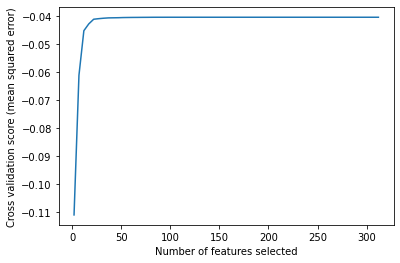

In [0]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (mean squared error)")
plt.plot(range(2, 5*len(selectionObj.grid_scores_) + 2, 5), selectionObj.grid_scores_)
plt.show()

In [0]:
#check features
selected_features = X_train.columns[selectionObj.support_]
print(selected_features)

Index(['gearbox', 'powerPS', 'kilometer', 'monthOfRegistration',
       'notRepairedDamage', 'brand_audi', 'brand_bmw', 'brand_chevrolet',
       'brand_chrysler', 'brand_citroen',
       ...
       'model_x_reihe', 'model_x_trail', 'model_x_type', 'model_xc_reihe',
       'model_yaris', 'model_yeti', 'model_ypsilon', 'model_z_reihe',
       'model_zafira', 'years_old'],
      dtype='object', length=122)


In [0]:
#Making predictions on the Test Set
y_pred = selectionObj.predict(X_test)

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_pred,y_test))

0.040099079653937095


In [0]:
print(10**y_pred)
print(10**y_test)
print(mean_squared_error(10**y_test,10**y_pred))

[  748.35256113 13942.4438755  11425.02599297 ... 11264.18436024
  7787.98431295  3208.37772608]
85971      1300.0
205804    10900.0
13374      8200.0
235012    11000.0
169522     1150.0
           ...   
16494      4500.0
259055     2500.0
24516     12800.0
13263      7500.0
25001      3500.0
Name: log_price, Length: 81600, dtype: float64
58869216.0597717


In [0]:
# store resulting model columns
print(selectionObj.support_.tolist())

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, True, True, True, True, False, True, True, True, True, False, False, True, True, True, True, False, False, True, False, True, True, True, True, True, True, True, True, True, True, False, True, False, False, False, True, False, True, False, False, True, False, True, False, True, True, False, True, False, True, False, False, False, False, True, False, False, False, False, True, True, False, True, True, True, True, False, True, False, False, False, False, False, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, Fals

In [0]:
# Get selected columns from previous result
mask = [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, True, True, True, True, False, True, True, True, True, False, False, True, True, True, True, False, False, True, False, True, True, True, True, True, True, True, True, True, True, False, True, False, False, False, True, False, True, False, False, True, False, True, False, True, True, False, True, False, True, False, False, False, False, True, False, False, False, False, True, True, False, True, True, True, True, False, True, False, False, False, False, False, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, True, False, False, True, True, False, False, False, False, False, False, False, False, True, False, False, False, True, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, True, False, True, True, False, True, False, False, True, False, False, False, True, False, False, False, False, False, True, False, False, False, False, True, False, False, True, False, False, True, True, False, True, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, True, True, False, False, False, False, True, True, True, False, False, False, True, True, True, True, False, True, True, False, True, True, True, False, False, False, False, True, False, False, True, True, False, False, True, True, True, True, True, True, True, True, True, True]
df = X.iloc[:,mask]

In [0]:
#Loop for counting brand and model variables
column_list = df.columns.tolist()
model_cnt = 0
brand_cnt = 0
total_cnt = 0

for item in column_list:
  if item.startswith('model'):
    model_cnt += 1
  elif item.startswith('brand'):
    brand_cnt += 1
  total_cnt +=1
print('models: ', model_cnt)
print('brands: ', brand_cnt)
print('total: ', total_cnt)

models:  77
brands:  30
total:  122


## RFE on Random Forest models

In [0]:
# Random Forest + Feature Selection

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Loading the dataset
try:
  dataset = pd.read_csv('processed.csv')
except:
  dataset = pd.read_csv('drive/My Drive/processed.csv')

# print(dataset)

X = dataset.iloc[:,2:] #We are not using column 1. Also we slice it this way because we want X to be a matrix
y = dataset.iloc[:,1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [0]:
#import model
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV

# define new class for pipeline that passes feature importance or coef to RFE
class PipelineRFE(Pipeline):

    def fit(self, X, y=None, **fit_params):
        super(PipelineRFE, self).fit(X, y, **fit_params)
        self.feature_importances_ = self.steps[-1][-1].feature_importances_
        return self

RF_pipeline =  PipelineRFE([
                    ('scale', StandardScaler()), 
                    ('RF', RandomForestRegressor(random_state=0, n_estimators=10, min_samples_leaf=4))
                     ], verbose=True)

selectionObj = RFECV(RF_pipeline, min_features_to_select=1, step=5, cv=10, scoring='neg_mean_squared_error', n_jobs=-1, verbose=10)
selectionObj.fit(X_train, y_train)
print("Optimal number of features : %d" % selectionObj.n_features_)

Fitting estimator with 307 features.
[Pipeline] ............. (step 1 of 2) Processing scale, total=   2.1s
[Pipeline] ................ (step 2 of 2) Processing RF, total=  37.1s
Fitting estimator with 302 features.
[Pipeline] ............. (step 1 of 2) Processing scale, total=   1.4s
[Pipeline] ................ (step 2 of 2) Processing RF, total=  36.2s
Fitting estimator with 297 features.
[Pipeline] ............. (step 1 of 2) Processing scale, total=   1.4s
[Pipeline] ................ (step 2 of 2) Processing RF, total=  36.6s
Fitting estimator with 292 features.
[Pipeline] ............. (step 1 of 2) Processing scale, total=   1.4s
[Pipeline] ................ (step 2 of 2) Processing RF, total=  36.2s
Fitting estimator with 287 features.
[Pipeline] ............. (step 1 of 2) Processing scale, total=   1.4s
[Pipeline] ................ (step 2 of 2) Processing RF, total=  35.7s
Fitting estimator with 282 features.
[Pipeline] ............. (step 1 of 2) Processing scale, total=   1.

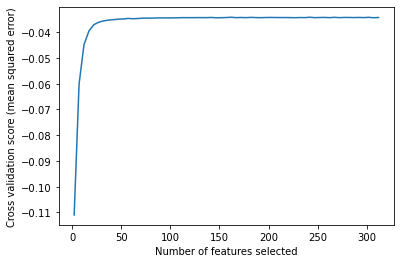

In [0]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (mean squared error)")
plt.plot(range(2, 5*len(selectionObj.grid_scores_) + 2, 5), selectionObj.grid_scores_)
plt.show()

In [0]:
#check features
selected_features = X_train.columns[selectionObj.support_]
print(selected_features)

Index(['gearbox', 'powerPS', 'kilometer', 'monthOfRegistration',
       'notRepairedDamage', 'brand_audi', 'brand_bmw', 'brand_chevrolet',
       'brand_chrysler', 'brand_citroen',
       ...
       'model_v70', 'model_vectra', 'model_viano', 'model_vito',
       'model_vivaro', 'model_wrangler', 'model_x_reihe', 'model_z_reihe',
       'model_zafira', 'years_old'],
      dtype='object', length=157)


In [0]:
#Making predictions on the Test Set
y_pred = selectionObj.predict(X_test)

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_pred,y_test))

0.03405538725913902


In [0]:
print(10**y_pred)
print(10**y_test)
print(mean_squared_error(10**y_test,10**y_pred))

[  797.16396685 12185.19869657 10298.9587313  ... 12831.01816248
  9583.69195246  4200.84133083]
85971      1300.0
205804    10900.0
13374      8200.0
235012    11000.0
169522     1150.0
           ...   
16494      4500.0
259055     2500.0
24516     12800.0
13263      7500.0
25001      3500.0
Name: log_price, Length: 81600, dtype: float64
52049748.08540151


In [0]:
not_selected = np.invert(selectionObj.support_)
removed_features = X_train.iloc[:,not_selected]
selected_features = X_train.iloc[:, selectionObj.support_]
#Display removed features by count of positives
print(dict(zip(removed_features.columns.tolist(), removed_features.sum().tolist())))

{'brand_lada': 88, 'brand_lancia': 230, 'brand_rover': 207, 'brand_subaru': 399, 'fuelType_cng': 326, 'fuelType_elektro': 39, 'fuelType_hybrid': 167, 'model_145': 20, 'model_159': 127, 'model_200': 8, 'model_300c': 82, 'model_5_reihe': 246, 'model_601': 113, 'model_6er': 140, 'model_850': 100, 'model_90': 43, 'model_900': 55, 'model_9000': 23, 'model_a1': 410, 'model_accord': 200, 'model_agila': 216, 'model_almera': 285, 'model_altea': 198, 'model_amarok': 23, 'model_antara': 64, 'model_auris': 140, 'model_avensis': 335, 'model_aveo': 70, 'model_aygo': 237, 'model_b_max': 17, 'model_boxster': 259, 'model_bravo': 151, 'model_c1': 218, 'model_c2': 217, 'model_c3': 273, 'model_c4': 260, 'model_c_max': 389, 'model_c_reihe': 123, 'model_captiva': 115, 'model_cayenne': 259, 'model_cc': 105, 'model_ceed': 148, 'model_charade': 13, 'model_cherokee': 75, 'model_citigo': 57, 'model_cl': 158, 'model_clubman': 124, 'model_combo': 205, 'model_cordoba': 185, 'model_corolla': 366, 'model_croma': 29, 

In [0]:
#Display selected features
print(selected_features.columns.tolist())

['gearbox', 'powerPS', 'kilometer', 'monthOfRegistration', 'notRepairedDamage', 'brand_audi', 'brand_bmw', 'brand_chevrolet', 'brand_chrysler', 'brand_citroen', 'brand_dacia', 'brand_daewoo', 'brand_daihatsu', 'brand_fiat', 'brand_ford', 'brand_honda', 'brand_hyundai', 'brand_jaguar', 'brand_jeep', 'brand_kia', 'brand_land_rover', 'brand_mazda', 'brand_mercedes_benz', 'brand_mini', 'brand_mitsubishi', 'brand_nissan', 'brand_opel', 'brand_peugeot', 'brand_porsche', 'brand_renault', 'brand_saab', 'brand_seat', 'brand_skoda', 'brand_smart', 'brand_sonstige_autos', 'brand_suzuki', 'brand_toyota', 'brand_trabant', 'brand_volkswagen', 'brand_volvo', 'vehicleType_bus', 'vehicleType_cabrio', 'vehicleType_coupe', 'vehicleType_kleinwagen', 'vehicleType_kombi', 'vehicleType_limousine', 'vehicleType_suv', 'fuelType_benzin', 'fuelType_diesel', 'fuelType_lpg', 'model_147', 'model_156', 'model_1_reihe', 'model_1er', 'model_2_reihe', 'model_3_reihe', 'model_3er', 'model_4_reihe', 'model_500', 'model_5

In [0]:
# Get columns without re-running model
# copy previous output 
column_names = ['gearbox', 'powerPS', 'kilometer', 'monthOfRegistration', 'notRepairedDamage', 'brand_audi', 'brand_bmw', 'brand_chevrolet', 'brand_chrysler', 'brand_citroen', 'brand_dacia', 'brand_daewoo', 'brand_daihatsu', 'brand_fiat', 'brand_ford', 'brand_honda', 'brand_hyundai', 'brand_jaguar', 'brand_jeep', 'brand_kia', 'brand_land_rover', 'brand_mazda', 'brand_mercedes_benz', 'brand_mini', 'brand_mitsubishi', 'brand_nissan', 'brand_opel', 'brand_peugeot', 'brand_porsche', 'brand_renault', 'brand_saab', 'brand_seat', 'brand_skoda', 'brand_smart', 'brand_sonstige_autos', 'brand_suzuki', 'brand_toyota', 'brand_trabant', 'brand_volkswagen', 'brand_volvo', 'vehicleType_bus', 'vehicleType_cabrio', 'vehicleType_coupe', 'vehicleType_kleinwagen', 'vehicleType_kombi', 'vehicleType_limousine', 'vehicleType_suv', 'fuelType_benzin', 'fuelType_diesel', 'fuelType_lpg', 'model_147', 'model_156', 'model_1_reihe', 'model_1er', 'model_2_reihe', 'model_3_reihe', 'model_3er', 'model_4_reihe', 'model_500', 'model_5er', 'model_6_reihe', 'model_7er', 'model_80', 'model_911', 'model_a2', 'model_a3', 'model_a4', 'model_a5', 'model_a6', 'model_a8', 'model_a_klasse', 'model_alhambra', 'model_andere', 'model_arosa', 'model_astra', 'model_b_klasse', 'model_beetle', 'model_berlingo', 'model_bora', 'model_c5', 'model_c_klasse', 'model_caddy', 'model_calibra', 'model_carisma', 'model_carnival', 'model_civic', 'model_clio', 'model_clk', 'model_colt', 'model_cooper', 'model_corsa', 'model_cr_reihe', 'model_cuore', 'model_defender', 'model_e_klasse', 'model_escort', 'model_fabia', 'model_fiesta', 'model_focus', 'model_fortwo', 'model_fox', 'model_g_klasse', 'model_galant', 'model_galaxy', 'model_golf', 'model_i_reihe', 'model_ibiza', 'model_jimny', 'model_ka', 'model_kaefer', 'model_laguna', 'model_leon', 'model_lupo', 'model_m_klasse', 'model_m_reihe', 'model_matiz', 'model_megane', 'model_micra', 'model_mondeo', 'model_mx_reihe', 'model_octavia', 'model_omega', 'model_one', 'model_panda', 'model_passat', 'model_polo', 'model_punto', 'model_q5', 'model_q7', 'model_roadster', 'model_s_klasse', 'model_s_max', 'model_scenic', 'model_seicento', 'model_sharan', 'model_sl', 'model_slk', 'model_spider', 'model_sprinter', 'model_stilo', 'model_tiguan', 'model_touran', 'model_transit', 'model_transporter', 'model_tt', 'model_twingo', 'model_v40', 'model_v70', 'model_vectra', 'model_viano', 'model_vito', 'model_vivaro', 'model_wrangler', 'model_x_reihe', 'model_z_reihe', 'model_zafira', 'years_old']

df = X.loc[:, X.columns.isin(column_names)]

In [0]:
#Loop for counting brand and model variables
column_list = df.columns.tolist()
model_cnt = 0
brand_cnt = 0
total_cnt = 0

for item in column_list:
  if item.startswith('model'):
    model_cnt += 1
  elif item.startswith('brand'):
    brand_cnt += 1
  total_cnt +=1
print('models: ', model_cnt)
print('brands: ', brand_cnt)
print('total: ', total_cnt)

models:  106
brands:  35
total:  157


#6. Polynomial and Regularized Regression

In [0]:
# Regularized Regression
# We will now be importing some required libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Loading the dataset
try:
  dataset = pd.read_csv('processed_without_modelbrand.csv')
except:
  dataset = pd.read_csv('drive/My Drive/processed_without_modelbrand.csv')
X = dataset.iloc[:,2:].values #We are not using column 1. Also we slice it this way because we want X to be a matrix
y = dataset.iloc[:,1].values

#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [0]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

#Normalizing the features
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#Polynomial Regression with No Regularization
polyFeatureObj = PolynomialFeatures(degree=2)
X_poly = polyFeatureObj.fit_transform(X_train)
X_poly_test = polyFeatureObj.transform(X_test)
prObj = LinearRegression(n_jobs=-1)
prObj.fit(X_poly, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [0]:
#Polynomial Regression with Ridge
ridgeObj = RidgeCV(cv=10, scoring='neg_mean_squared_error')
ridgeObj.fit(X_poly, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=10, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring='neg_mean_squared_error',
        store_cv_values=False)

In [0]:
#Polynomial Regression with Lasso
lassoObj = LassoCV(cv=10, random_state=0, n_jobs=-1, max_iter=3000)
lassoObj.fit(X_poly, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.711534847372604, tolerance: 4.912299988902881
  positive)


LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=3000, n_alphas=100, n_jobs=-1, normalize=False, positive=False,
        precompute='auto', random_state=0, selection='cyclic', tol=0.0001,
        verbose=False)

In [0]:
#Polynomial Regression with ElasticNet
enObj = ElasticNetCV(cv=10, l1_ratio=0.5, random_state=0,n_jobs=-1, max_iter=3000)
enObj.fit(X_poly, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=3000, n_alphas=100, n_jobs=-1,
             normalize=False, positive=False, precompute='auto', random_state=0,
             selection='cyclic', tol=0.0001, verbose=0)

In [0]:
from sklearn.metrics import mean_squared_error

y_pred = prObj.predict(X_poly_test)
print(mean_squared_error(y_test,y_pred))
print(y_pred)
print(y_test)
# bug due to non convergence?
print(min(y_pred))

135379902545064.4
[3.02706873 4.07456481 3.98421633 ... 4.09948266 3.57837391 3.48377097]
[3.11394335 4.0374265  3.91381385 ... 4.10720997 3.87506126 3.54406804]
-3197157203.5727425


The y_pred predicted a very low, very negative value which affected the mean squared error.

In [0]:
#Result of Ridge
y_pred = ridgeObj.predict(X_poly_test)
print(mean_squared_error(y_test,y_pred))
print(mean_squared_error(10**y_test, 10**y_pred)) # why is this so large?? Some coefficient blew up

0.05600523655390345
6.44642427149154e+16


In [0]:
#Result of Lasso
y_pred = lassoObj.predict(X_poly_test)
print(mean_squared_error(y_test,y_pred))
print(mean_squared_error(10**y_test, 10**y_pred)) # why is this so large?? Some coefficient blew up

0.05596342835536045
2.3893581539345564e+16


In [0]:
# Result of ElasticNet
y_pred = enObj.predict(X_poly_test)
print(mean_squared_error(y_test,y_pred))
print(mean_squared_error(10**y_test, 10**y_pred)) # why is this so large?? Some coefficient blew up


0.05596786387460332
2.280015055215357e+16


Unclear why the mean squared error in the exponentiated values is so large.

Could be due to the non-convergence warning?